<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/company_employee_baseline/banner.jpg">

# **Company-Employee Dataset Baseline**
---

# Importing Libraries

In [1]:
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

In [2]:
%matplotlib inline
palette = 'viridis'

# Importing Dataset

In [3]:
from pandas import read_csv
filename = '../input/company-employee-dataset/company_employee_details.csv'
usecols = ['company', 'department', 'employee_id', 'age', 'age_when_joined', 'years_in_the_company', 'salary', 'annual_bonus',
           'prior_years_experience', 'full_time', 'part_time', 'contractor']
df = read_csv(filepath_or_buffer=filename, usecols=usecols, )
logger.info(msg=df.shape)

__main__ - 2023-06-19 14:47:42,982 - INFO - (5000, 12)


In [4]:
logger.info(msg='\n{}'.format(df.head()))

__main__ - 2023-06-19 14:47:43,017 - INFO - 
    company     department  employee_id  age  age_when_joined  \
0   Glasses        BigData           16   41               38   
1   Glasses             AI           56   44               42   
2  Cheerper        Support           59   41               40   
3   Glasses         Design           40   39               32   
4   Glasses  Search Engine           47   30               22   

   years_in_the_company         salary  annual_bonus  prior_years_experience  \
0                     3   68074.971354  17664.104103                       3   
1                     2   49092.147458  21551.141079                       2   
2                     1   40000.000000  23698.878851                       2   
3                     7  108192.465506  21570.929657                       1   
4                     9   71291.191132  21565.505715                       2   

   full_time  part_time  contractor  
0   0.000000   0.000000    1.000000  
1   0.0

# Data Cleaning

In [5]:
logger.info(msg=df.info())

__main__ - 2023-06-19 14:47:43,064 - INFO - None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company                 5000 non-null   object 
 1   department              5000 non-null   object 
 2   employee_id             5000 non-null   int64  
 3   age                     5000 non-null   int64  
 4   age_when_joined         5000 non-null   int64  
 5   years_in_the_company    5000 non-null   int64  
 6   salary                  5000 non-null   float64
 7   annual_bonus            5000 non-null   float64
 8   prior_years_experience  5000 non-null   int64  
 9   full_time               5000 non-null   float64
 10  part_time               5000 non-null   float64
 11  contractor              5000 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 468.9+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

columns = ['company', 'department']
for column in columns:
    logger.info(msg='column {} has values {}'.format(column, df[column].unique().tolist()))
    df[column] = LabelEncoder().fit_transform(df[column])


__main__ - 2023-06-19 14:47:44,504 - INFO - column company has values ['Glasses', 'Cheerper', 'Pear']
__main__ - 2023-06-19 14:47:44,508 - INFO - column department has values ['BigData', 'AI', 'Support', 'Design', 'Search Engine', 'Sales']


# Exploratory Data Analysis

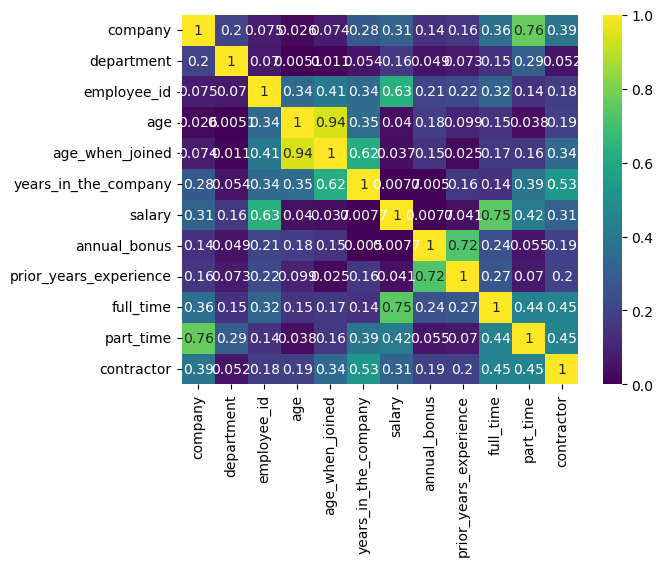

In [7]:
from seaborn import heatmap
features = df.columns.to_list()
correlations = df[features].corr(numeric_only=False)
heatmap(correlations.abs(), cmap = palette, annot = True, vmin=0);

<Axes: xlabel='salary', ylabel='Count'>

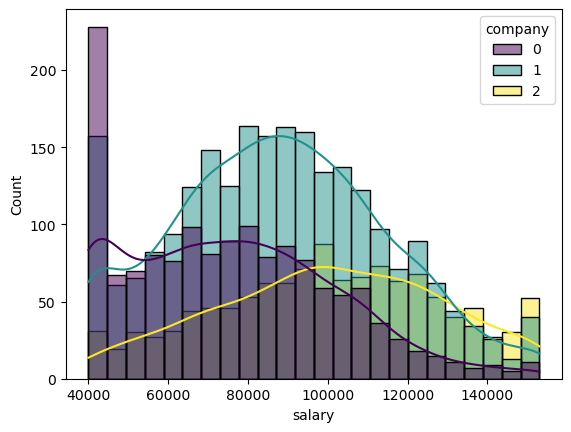

In [8]:
from seaborn import histplot 
histplot(data=df, x='salary', hue='company', kde=True, palette = palette, )

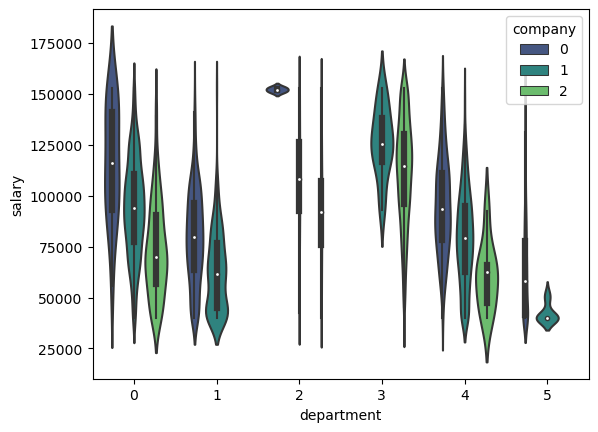

In [9]:
from seaborn import violinplot
violinplot(data=df, x='department', y='salary', hue='company', palette=palette, );

# Training Models

In [10]:
from sklearn.model_selection import train_test_split
random_state = 1
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['salary']), df['salary'], test_size=0.3 , random_state=random_state)